In [233]:
import numpy as np
import pandas as pd
import pybaseball as pyb 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [8]:
from mlb_scraper.api_scraper import MLB_Scrape

# Initialize the scraper
scraper = MLB_Scrape()

# Get sport IDs
sport_ids = scraper.get_sport_id()
print(sport_ids)

shape: (18, 7)
┌──────┬──────┬─────────────────────┬────────────────────┬──────────────┬───────────┬──────────────┐
│ id   ┆ code ┆ link                ┆ name               ┆ abbreviation ┆ sortOrder ┆ activeStatus │
│ ---  ┆ ---  ┆ ---                 ┆ ---                ┆ ---          ┆ ---       ┆ ---          │
│ i64  ┆ str  ┆ str                 ┆ str                ┆ str          ┆ i64       ┆ bool         │
╞══════╪══════╪═════════════════════╪════════════════════╪══════════════╪═══════════╪══════════════╡
│ 1    ┆ mlb  ┆ /api/v1/sports/1    ┆ Major League       ┆ MLB          ┆ 11        ┆ true         │
│      ┆      ┆                     ┆ Baseball           ┆              ┆           ┆              │
│ 11   ┆ aaa  ┆ /api/v1/sports/11   ┆ Triple-A           ┆ AAA          ┆ 101       ┆ true         │
│ 12   ┆ aax  ┆ /api/v1/sports/12   ┆ Double-A           ┆ AA           ┆ 201       ┆ true         │
│ 13   ┆ afa  ┆ /api/v1/sports/13   ┆ High-A             ┆ A+           ┆ 30

In [9]:
# data that I need:
#
"""
walker buehler IVB by game
IVB of mets/yankees/dodgers in each game 3
can I get weather for games and a pitchers IVB for the season? - normalize each pitchers IVB to their 
"""
# What data can I get?
# Want -> Walker Buehler pitches for the season!

'\nwalker buehler IVB by game\nIVB of mets/yankees/dodgers in each game 3\ncan I get weather for games and a pitchers IVB for the season? - normalize each pitchers IVB to their \n'

In [248]:
# 
def lin_reg(X, y):
    X = sm.add_constant(X)  # Adds a constant term to the model
    # Fit the model
    model = sm.OLS(y.astype(float), X.astype(float)).fit()

    # Summary of the model
    print(model.summary())
    return model




In [10]:
# years = [2024]
# ids = [1]
schedule_2024 = scraper.get_schedule()
# print(schedule_2024)


In [14]:
team = "Los Angeles Dodgers"
player = "Walker Buehler"
player_fname, player_lname = player.split()
buehler_id = pyb.playerid_lookup(player_lname, player_fname).iloc[0]['key_mlbam']
# this works
# game_ids = schedule_2024.filter((schedule_2024['away'] == team) | (schedule_2024['home'] == team))['game_id']
# print(game_ids)


Gathering player lookup table. This may take a moment.


In [17]:
buehler_df_pyb = pyb.statcast_pitcher('2024-03-28', '2024-10-01', buehler_id)

buehler_df_pyb["pfx_z"] = buehler_df_pyb["pfx_z"] * 12
buehler_df_pyb["pfx_x"] = buehler_df_pyb["pfx_x"] * 12

# buehler_df_pyb.head()
buehler_fastballs = buehler_df_pyb[buehler_df_pyb['pitch_type'] == "FF"]
buehler_fastballs.head()

Gathering Player Data


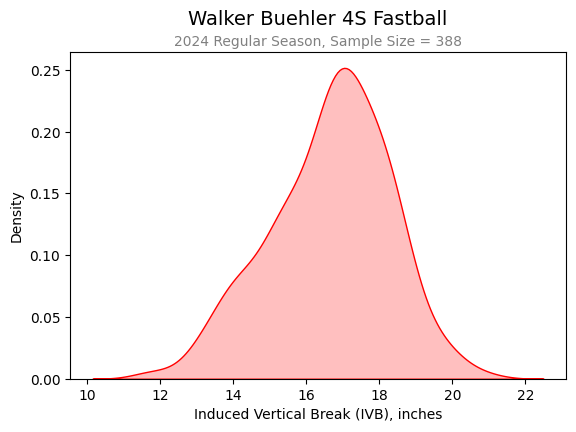

In [56]:
# give me a distribution of walker buehlers IVB by pitch

sns.kdeplot(buehler_fastballs["pfx_z"], fill=True, color='red')  # shade=True adds a filled area
plt.title('Walker Buehler 4S Fastball', fontsize=14, pad=20)
sample_size = len(buehler_fastballs["pfx_z"])
plt.text(
    0.5, 1.02,  # X and Y coordinates in Axes-relative terms
    f"2024 Regular Season, Sample Size = {sample_size}",
    fontsize=10,
    color='gray',
    ha='center',
    transform=plt.gca().transAxes  # Place relative to the axes
)
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin
plt.xlabel('Induced Vertical Break (IVB), inches')
plt.ylabel('Density')
plt.show()

In [61]:
# Now we have an idea of what WB fastball looked like in 2024.
# Next steps
# To what degree does weather play a role? -> is there a weather field? (huge if true)
# Corr between Buehler fastball IVB and performance? (don't know how important this is to discuss, pretty widely accepted that higher IVB is better stuff)
# Let's look at playoff games first.


playoff_buehler_df = pyb.statcast_pitcher('2024-10-01', '2024-10-31', buehler_id)

playoff_buehler_df["pfx_z"] = playoff_buehler_df["pfx_z"] * 12
playoff_buehler_df["pfx_x"] = playoff_buehler_df["pfx_x"] * 12
playoff_buehler_df.head()


buehler_playoff_fastballs = playoff_buehler_df[playoff_buehler_df['pitch_type'] == "FF"]
buehler_playoff_fastballs.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
5,FF,2024-10-30,97.2,-1.34,5.56,"Buehler, Walker",669224,621111,NaN,ball,...,1,4,2,1,NaN,NaN,1.04,0.44,-0.44,45.1
8,FF,2024-10-30,96.2,-1.31,5.62,"Buehler, Walker",669224,621111,NaN,ball,...,1,4,2,1,NaN,NaN,0.98,0.37,-0.37,51.6
12,FF,2024-10-30,96.7,-1.00,5.76,"Buehler, Walker",683011,621111,NaN,ball,...,1,4,2,1,NaN,NaN,0.94,0.39,0.39,52.8
15,FF,2024-10-30,96.1,-1.25,5.67,"Buehler, Walker",683011,621111,NaN,ball,...,1,4,2,1,NaN,NaN,0.92,0.28,0.28,48.1
16,FF,2024-10-28,94.8,-1.31,5.58,"Buehler, Walker",657077,621111,field_out,hit_into_play,...,2,1,12,2,2.0,1.0,1.01,0.41,-0.41,45.2


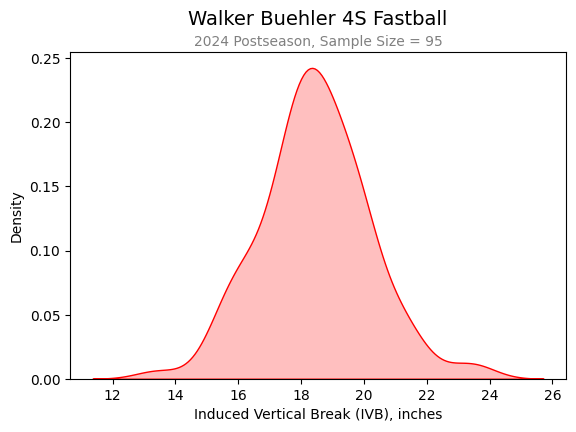

In [128]:
sns.kdeplot(buehler_playoff_fastballs["pfx_z"], fill=True, color='red')  # shade=True adds a filled area
plt.title('Walker Buehler 4S Fastball', fontsize=14, pad=20)
sample_size = len(buehler_playoff_fastballs["pfx_z"])
plt.text(
    0.5, 1.02,  # X and Y coordinates in Axes-relative terms
    f"2024 Postseason, Sample Size = {sample_size}",
    fontsize=10,
    color='gray',
    ha='center',
    transform=plt.gca().transAxes  # Place relative to the axes
)
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin
plt.xlabel('Induced Vertical Break (IVB), inches')
plt.ylabel('Density')
plt.show()

In [68]:
#Get z scores of buehlers fastball, compare to those of cortes and Severino
# Need distribution of Buehler / cortes / Severino fastballs from regular season games
severino_id = pyb.playerid_lookup("Severino", "Luis").iloc[0]['key_mlbam']
cortes_id = 641482

severino_df_pyb = pyb.statcast_pitcher('2024-03-28', '2024-10-01', severino_id)

severino_df_pyb["pfx_z"] = severino_df_pyb["pfx_z"] * 12
severino_df_pyb["pfx_x"] = severino_df_pyb["pfx_x"] * 12
severino_fastballs = severino_df_pyb[severino_df_pyb['pitch_type'] == "FF"]


cortes_df_pyb = pyb.statcast_pitcher('2024-03-28', '2024-10-01', cortes_id)

cortes_df_pyb["pfx_z"] = cortes_df_pyb["pfx_z"] * 12
cortes_df_pyb["pfx_x"] = cortes_df_pyb["pfx_x"] * 12
cortes_fastballs = cortes_df_pyb[cortes_df_pyb['pitch_type'] == "FF"]
 

Gathering Player Data
Gathering Player Data


In [ ]:
# get mean, std deviation for cortes / severino / buehler
cortes_ff_ivb_mean, cortes_ff_ivb_stddev = np.mean(cortes_fastballs['pfx_z']), np.std(cortes_fastballs['pfx_z'])
severino_ff_ivb_mean, severino_ff_ivb_stddev = np.mean(severino_fastballs['pfx_z']), np.std(severino_fastballs['pfx_z'])
buehler_ff_ivb_mean, buehler_ff_ivb_stddev = np.mean(buehler_fastballs['pfx_z']), np.std(buehler_fastballs['pfx_z'])



In [78]:
# get playoff data for cortes WS G3 / severino NLCSG3
cortes_g3_df = pyb.statcast_pitcher('2024-10-27', '2024-10-29', cortes_id)
cortes_g3_df["pfx_z"] = cortes_g3_df["pfx_z"] * 12
cortes_g3_df["pfx_x"] = cortes_g3_df["pfx_x"] * 12

severino_g3_df = pyb.statcast_pitcher('2024-10-15', '2024-10-17', severino_id)
severino_g3_df["pfx_z"] = severino_g3_df["pfx_z"] * 12
severino_g3_df["pfx_x"] = severino_g3_df["pfx_x"] * 12



Gathering Player Data
Gathering Player Data


In [81]:
# get z-scores for players

#REGULAR SEASON
# cortes_fastballs['pfx_z_zscore'] = (cortes_fastballs['pfx_z'] - cortes_ff_ivb_mean) / cortes_ff_ivb_stddev
# severino_fastballs['pfx_z_zscore'] = (severino_fastballs['pfx_z'] - severino_ff_ivb_mean) / severino_ff_ivb_stddev

severino_g3_ff = severino_g3_df[severino_g3_df['pitch_type'] == "FF"]
severino_g3_ff_ivb_mean = np.mean(severino_g3_ff["pfx_z"])
severino_g3_ff_zscore = (severino_g3_ff_ivb_mean - severino_ff_ivb_mean) / severino_ff_ivb_stddev
print("SEVERINO", severino_g3_ff_ivb_mean, severino_g3_ff_zscore)

buehler_nlcs_g3_ff = buehler_playoff_fastballs[buehler_playoff_fastballs['game_date'] == '2024-10-16']
buehler_nlcs_g3_ff_ivb_mean = np.mean(buehler_nlcs_g3_ff['pfx_z'])
buehler_nlcs_g3_ff_zscore = (buehler_nlcs_g3_ff_ivb_mean - buehler_ff_ivb_mean) / buehler_ff_ivb_stddev
print("BUEHLER", buehler_nlcs_g3_ff_ivb_mean, buehler_nlcs_g3_ff_zscore)



## Interesting! Buehler's mean fastball IVB saw a greater increase compared to his season average than Severino's, 
# who was pitching at the same time!




SEVERINO 18.0528 1.2293479325798036
BUEHLER 20.235 2.1861419655834693


In [87]:
#Weather data
weather_df = pd.read_csv('gameinfo.csv') 
weather_df = weather_df[weather_df['season'] == 2024]
   
    


/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/3673495688.py:2: DtypeWarning: Columns (10,11,13,17,19,21,27,28,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv('gameinfo.csv')


In [136]:

for column in weather_df.columns:
    print(column)
    
# useful columns for movement: temp, winddir, windspeed



# print(weather_df['winddir'].unique())

team_mapping = {
    'SDN': 'SD',
    'LAN': 'LAD',
    'NYA': 'NYY',
    'NYN': 'NYM',
    'CHA': 'CWS',
    'CHN': 'CHC',
    'SFN': 'SF',
    'ANA': 'LAA',
    'SLN': "STL",
    'KCA': "KC",
    'TBA': "TB",
    'ARI': "AZ"
}
retrosheet_team_mapping = {v: k for k, v in team_mapping.items()}


gid
visteam
hometeam
site
date
number
starttime
daynight
innings
tiebreaker
usedh
htbf
timeofgame
attendance
fieldcond
precip
sky
temp
winddir
windspeed
oscorer
forfeit
suspend
umphome
ump1b
ump2b
ump3b
umplf
umprf
wp
lp
save
gametype
vruns
hruns
wteam
lteam
line
batteries
lineups
box
pbp
season


In [125]:
weather_df.head(20)

# weather_df['hometeam'].unique()

,gid,visteam,hometeam,site,date,number,starttime,daynight,innings,tiebreaker,...,vruns,hruns,wteam,lteam,line,batteries,lineups,box,pbp,season
216896,SDN202403200,LAN,SDN,SEO01,20240320,0.0,7:05PM,night,9.0,2.0,...,5,2,LAN,SDN,y,both,y,y,y,2024
216897,LAN202403210,SDN,LAN,SEO01,20240321,0.0,7:05PM,night,9.0,2.0,...,15,11,SDN,LAN,y,both,y,y,y,2024
216898,ARI202403280,COL,ARI,PHO01,20240328,0.0,7:10PM,night,9.0,2.0,...,1,16,ARI,COL,y,both,y,y,y,2024
216899,BAL202403280,ANA,BAL,BAL12,20240328,0.0,3:05PM,day,9.0,2.0,...,3,11,BAL,ANA,y,both,y,y,y,2024
216900,CHA202403280,DET,CHA,CHI12,20240328,0.0,3:10PM,day,9.0,2.0,...,1,0,DET,CHA,y,both,y,y,y,2024
216901,CIN202403280,WAS,CIN,CIN09,20240328,0.0,4:10PM,day,9.0,2.0,...,2,8,CIN,WAS,y,both,y,y,y,2024
216902,HOU202403280,NYA,HOU,HOU03,20240328,0.0,3:10PM,day,9.0,2.0,...,5,4,NYA,HOU,y,both,y,y,y,2024
216903,KCA202403280,MIN,KCA,KAN06,20240328,0.0,3:10PM,day,9.0,2.0,...,4,1,MIN,KCA,y,both,y,y,y,2024
216904,LAN202403280,SLN,LAN,LOS03,20240328,0.0,1:10PM,day,9.0,2.0,...,1,7,LAN,SLN,y,both,y,y,y,2024
216905,MIA202403280,PIT,MIA,MIA02,20240328,0.0,4:10PM,day,9.0,2.0,...,6,5,PIT,MIA,y,both,y,y,y,2024


In [98]:
all_pitches = pyb.statcast(start_dt="2024-03-28", end_dt="2024-10-01")


This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 188/188 [03:05<00:00,  1.01it/s]


In [161]:
all_fastballs = all_pitches[all_pitches["pitch_type"] == "FF"]
all_fastballs["pfx_x"] = all_fastballs["pfx_x"] * 12
all_fastballs["pfx_z"] = all_fastballs["pfx_z"] * 12

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/260428065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_fastballs["pfx_x"] = all_fastballs["pfx_x"] * 12
/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/260428065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_fastballs["pfx_z"] = all_fastballs["pfx_z"] * 12


In [304]:
pyb.cache.enable()
playoff_pitches = pyb.statcast(start_dt="2024-10-01", end_dt="2024-10-31")

playoff_pitches['pfx_z'] = playoff_pitches['pfx_z'] * 12
playoff_pitches['pfx_x'] = playoff_pitches['pfx_x'] * 12

This is a large query, it may take a moment to complete


100%|██████████| 31/31 [00:09<00:00,  3.22it/s]


In [333]:
playoff_fastballs = playoff_pitches[playoff_pitches["pitch_type"] == "FF"]


In [353]:
pitchers_ff_ivb_df = all_fastballs.groupby("pitcher").agg(
        mean_pfx_z = ('pfx_z','mean'),
        std_dev_pfx_z = ('pfx_z','std'), 
        pitcher_name = ('player_name', 'first')).reset_index()


In [354]:
# pitchers_ff_ivb_df.columns = ['pitcher', 'mean_pfx_z', 'std_dev_pfx_z']

pitchers_ff_ivb_df.head()

,pitcher,mean_pfx_z,std_dev_pfx_z,pitcher_name
0,434378,19.281456,1.694965,"Verlander, Justin"
1,448179,16.84,1.187205,"Hill, Rich"
2,450203,10.487345,1.842895,"Morton, Charlie"
3,453286,15.924082,1.434249,"Scherzer, Max"
4,455119,15.523529,1.852211,"Martin, Chris"


In [164]:
# now we can merge this back to all of the fastballs
# and merge in temperature for each game?
# and then group by game and calculate mean z-score (by game)?
# is mean z-score an appropriate metric in this case? -> yes, because mean z-score should be zero for all games?
all_fastballs = all_fastballs.merge(pitchers_ff_ivb_df, on="pitcher", how="left")

all_fastballs.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,mean_pfx_z,std_dev_pfx_z
0,FF,2024-10-01,97.5,-1.51,6.32,"Brieske, Beau",518792,689225,NaN,foul,...,3,3,1,1,0.82,0.4,-0.4,55.0,18.018638,1.619246
1,FF,2024-10-01,100.1,-1.24,6.3,"Brieske, Beau",676801,689225,NaN,foul,...,3,21,1,1,0.65,0.67,0.67,51.9,18.018638,1.619246
2,FF,2024-10-01,100.1,-1.3,6.3,"Brieske, Beau",676801,689225,NaN,foul,...,3,21,1,1,0.6,0.37,0.37,51.9,18.018638,1.619246
3,FF,2024-10-01,97.3,-1.47,6.25,"Brieske, Beau",605170,689225,NaN,called_strike,...,3,3,1,1,0.76,0.37,-0.37,51.2,18.018638,1.619246
4,FF,2024-10-01,96.5,-1.6,6.24,"Brieske, Beau",605170,689225,NaN,ball,...,3,3,1,1,0.81,0.39,-0.39,52.4,18.018638,1.619246


In [ ]:
all_fastballs["ff_ivb_zscore"] = (all_fastballs["pfx_z"] - all_fastballs["mean_pfx_z"]) / all_fastballs["std_dev_pfx_z"]


In [481]:
all_fastballs["ff_ivb_pct_difference"] = (all_fastballs["pfx_z"]/all_fastballs["mean_pfx_z"])-1


In [476]:
# for column in all_fastballs.columns:
#     print(column)
    
def map_team_name(team_name):
    if team_name in retrosheet_team_mapping:
        return retrosheet_team_mapping[team_name]
    return team_name

def map_to_gid(row):
    return f"{row['home_team_alt']}{row['game_date_str']}0"
all_fastballs['game_pk'].head(-5)
all_fastballs["home_team_alt"] = all_fastballs["home_team"].map(lambda x: map_team_name(x))
all_fastballs["home_team_alt"].unique()
all_fastballs["game_date_str"] = all_fastballs["game_date"].map(lambda x: x.strftime("%Y%m%d"))
all_fastballs = all_fastballs[all_fastballs["game_date"] != ""]
all_fastballs["retro_gid"] = all_fastballs.apply(map_to_gid, axis=1)

all_fastballs.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,api_break_x_arm,api_break_x_batter_in,arm_angle,mean_pfx_z,std_dev_pfx_z,ff_ivb_zscore,home_team_alt,game_date_str,retro_gid,ff_ivb_pct_difference
0,FF,2024-10-01,97.5,-1.51,6.32,"Brieske, Beau",518792,689225,NaN,foul,...,0.4,-0.4,55.0,18.018638,1.619246,0.729575,HOU,20241001,HOU202410010,-1.266391
1,FF,2024-10-01,100.1,-1.24,6.3,"Brieske, Beau",676801,689225,NaN,foul,...,0.67,0.67,51.9,18.018638,1.619246,1.174227,HOU,20241001,HOU202410010,-1.446205
2,FF,2024-10-01,100.1,-1.3,6.3,"Brieske, Beau",676801,689225,NaN,foul,...,0.37,0.37,51.9,18.018638,1.619246,1.396553,HOU,20241001,HOU202410010,-1.246412
3,FF,2024-10-01,97.3,-1.47,6.25,"Brieske, Beau",605170,689225,NaN,called_strike,...,0.37,-0.37,51.2,18.018638,1.619246,1.248335,HOU,20241001,HOU202410010,-1.246412
4,FF,2024-10-01,96.5,-1.6,6.24,"Brieske, Beau",605170,689225,NaN,ball,...,0.39,-0.39,52.4,18.018638,1.619246,1.02601,HOU,20241001,HOU202410010,-1.259731


In [482]:
# Just need temperature, wind, winddir, for now.
weather_df_trunc = weather_df[["gid","temp","winddir","windspeed"]]
weather_df_trunc.columns = ["retro_gid","temp","winddir","windspeed"]


weather_df_trunc.head()
all_fastballs_weather = pd.merge(all_fastballs, weather_df_trunc, on="retro_gid", how="left")
all_fastballs_weather[~all_fastballs_weather['temp'].isna()].head()

for column in all_fastballs.columns:
    print(column)

pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
fielder_2
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axis
delta_home_win_exp
d

In [483]:
all_pitcher_ff_games = all_fastballs_weather.groupby('game_pk').agg(
                                home_team = ('home_team', 'first'),
                                mean_ff_ivb_zscore = ('ff_ivb_zscore','mean'), 
                                mean_ff_ivb_pct_difference = ('ff_ivb_pct_difference', 'mean'),
                                temp = ('temp', 'first'), 
                                windspeed = ('windspeed', 'first'), 
                                winddir = ('winddir', 'first'), 
                                mean_ivb = ('mean_pfx_z', 'first'),
                                std_dev_ivb = ('std_dev_pfx_z','first')).reset_index()
all_pitcher_ff_games = all_pitcher_ff_games[~all_pitcher_ff_games['temp'].isna()] 

# all_pitcher_ff_games.head()

# filter out where temp == 0
all_pitcher_ff_games = all_pitcher_ff_games[all_pitcher_ff_games['temp'] != 0]

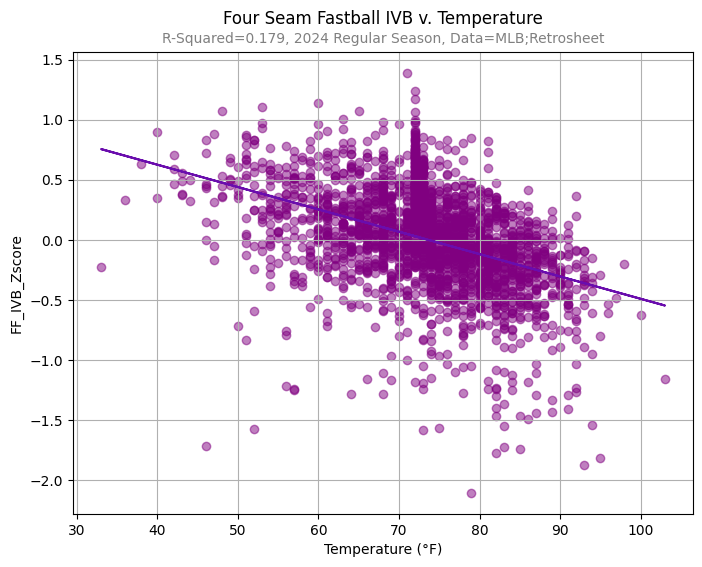

In [ ]:
#plot IVB zscore vs temp
plt.figure(figsize=(8, 6))
naive_predictions = naive_model.predict(sm.add_constant(all_pitcher_ff_games['temp']))
plt.scatter(all_pitcher_ff_games['temp'], all_pitcher_ff_games['mean_ff_ivb_zscore'], color='purple', alpha=0.5)
plt.plot(all_pitcher_ff_games['temp'], naive_predictions, color='#6A0DAD', label='Regression Line')

plt.title('Four Seam Fastball IVB v. Temperature', pad=20)
plt.text(
    0.5, 1.02,  # X and Y coordinates in Axes-relative terms
    f"R-Squared=0.179, 2024 Regular Season, Data=MLB;Retrosheet",
    fontsize=10,
    color='gray',
    ha='center',
    transform=plt.gca().transAxes  # Place relative to the axes
)
plt.xlabel('Temperature (°F)')
plt.ylabel('FF_IVB_Zscore')
plt.grid(True)
plt.show()

In [319]:
# correlation of ivb score vs temperature
print(all_pitcher_ff_games.dtypes)
all_pitcher_ff_games['temp'] = pd.to_numeric(all_pitcher_ff_games['temp'], errors='coerce')
print(all_pitcher_ff_games['temp'].isna().sum())

game_pk                 Int64
mean_ff_ivb_zscore    Float64
temp                   object
windspeed              object
winddir                object
pitcher                 Int64
mean_ivb              Float64
std_dev_ivb           Float64
dtype: object
0


In [325]:
# TODO: rename all_pitcher_ff_games to all_pitcher_ff_games

,game_pk,mean_ff_ivb_zscore,temp,windspeed,winddir,pitcher,mean_ivb,std_dev_ivb
81,744876,-0.13153,68,0,unknown,663767,14.781818,1.206063
82,744877,-0.194531,72,16,tolf,643338,17.981429,1.572037
83,744878,0.327777,68,0,unknown,670766,14.513957,1.931775
84,744879,-0.061417,68,15,tolf,641312,13.263243,2.900626
85,744880,-0.151988,69,15,ltor,669622,10.824615,2.305647
...,...,...,...,...,...,...,...,...
2426,747224,0.2293,73,2,unknown,666818,16.543385,1.709326
2427,775333,0.647894,72,10,fromlf,663158,18.000349,1.691307
2428,775340,0.340935,74,0,unknown,592773,17.858824,1.944132
2429,775343,0.690043,66,2,fromlf,668674,15.066977,1.689406


In [361]:
all_pitcher_ff_games['headwind_boost'] = all_pitcher_ff_games['winddir'].isin(["tocf", "tolf", "torf"])
all_pitcher_ff_games['winddir'].unique()
all_pitcher_ff_games['headwind_speed'] = all_pitcher_ff_games['headwind_boost'] * all_pitcher_ff_games['windspeed']

In [ ]:
print(all_pitcher_ff_games[['temp', 'mean_ff_ivb_zscore', 'windspeed', 'headwind_speed']].corr())
print(all_pitcher_ff_games['winddir'].isna().sum())


                        temp  mean_ff_ivb_zscore  windspeed  headwind_speed
temp                1.000000           -0.422921  -0.080775       -0.052100
mean_ff_ivb_zscore -0.422921            1.000000  -0.168888       -0.055383
windspeed          -0.080775           -0.168888   1.000000        0.479254
headwind_speed     -0.052100           -0.055383   0.479254        1.000000
0


In [466]:
# MODEL
# there is some correlation with both temperature and windspeed, which don't have much correlation between themselves.
# appears we might have some variables for a linear model here!
# presence of wind to CF?
df = all_pitcher_ff_games
# df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df = df.dropna(subset=['mean_ff_ivb_zscore'])

naive_model = lin_reg(df['temp'], df['mean_ff_ivb_zscore'])

improved_model = lin_reg(df[['temp', 'windspeed']], df['mean_ff_ivb_zscore'])



                            OLS Regression Results                            
Dep. Variable:     mean_ff_ivb_zscore   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     491.8
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           7.13e-99
Time:                        21:27:47   Log-Likelihood:                -1080.5
No. Observations:                2292   AIC:                             2165.
Df Residuals:                    2290   BIC:                             2176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3304      0.060     22.077      0.0

In [437]:
league_avg_ivb, league_avg_ivb_stddev = all_fastballs['pfx_z'].mean(), all_fastballs['pfx_z'].std()
print("League Average iVB", league_avg_ivb, "League iVB Standard Deviation", league_avg_ivb_stddev)
# all_pitcher_ff_games.head()

temp_coef = -0.0186
ten_deg_change = temp_coef * -10 * league_avg_ivb_stddev

print(ten_deg_change, (ten_deg_change / league_avg_ivb))



League Average iVB 15.715044839371766 League iVB Standard Deviation 2.9783283231250963
0.5539690681012679 0.03525087416316998


In [388]:
# PREDICTIONS
# We now have a model that will predict the z-score given temperature and wind, lets use it to predict what Walker Buehler's z-score would be in G3 of NLCS, and Severinos!
# weather_df.tail(20)

nlcs_g3_weather = weather_df_trunc[weather_df_trunc['retro_gid'] == "NYN202410160"]
print(nlcs_g3_weather.head())
# nlcs_g3_weather_input = nlcs_g3_weather[['temp', 'windspeed']].to_numpy().flatten()
# print(nlcs_g3_weather_input)
# nlcs_g3_weather_input = np.concatenate([[1], nlcs_g3_weather_input])
# print(nlcs_g3_weather_input)
naive_pred_zscore = naive_model.predict(np.concatenate([[1], nlcs_g3_weather[['temp']].to_numpy().flatten()]))

improved_pred_zscore = improved_model.predict(np.concatenate([[1], nlcs_g3_weather[['temp', 'windspeed']].to_numpy().flatten()]))
print("NLCS G3 Predicted 4S iVB Z-Score:", improved_pred_zscore[0])

           retro_gid temp winddir windspeed
219357  NYN202410160   51    ltor         8
NLCS G3 Predicted 4S iVB Z-Score: 0.41454194591060234


/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/305322497.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


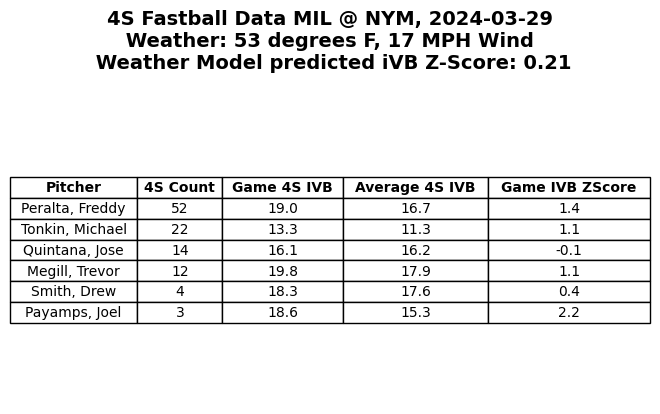

In [451]:
# GAME ZSCORES
# Lance Broz says look at Freddy Peralta vs Mets early season, curious if similar movement there.
# How does Walker Buehler's movement look in Yankee Stadium 2 weeks later?

def map_to_gid(team, date):
    return f"{map_team_name(team)}{date.replace('-', '')}0"

def get_game_4s_zscores(game_pk, is_playoffs=False, model=improved_model):
    if is_playoffs:
        df = playoff_fastballs
    else:
        df = all_fastballs
    game_fastballs = df[df["game_pk"] == game_pk]
    game_pitcher_ivb = game_fastballs.groupby('pitcher').agg(game_mean_ivb = ('pfx_z', 'mean'), ff_thrown=('pfx_z', 'count'))

    # nlcs_g3_zscores.head()
    # nlcs_g3_zscores['season_mean'] = 
    game_zscores = game_pitcher_ivb.merge(pitchers_ff_ivb_df, on="pitcher", how="left")
    game_zscores.columns = ['pitcher', 'game_ff_ivb', 'ff_thrown', 'reg_season_mean_ivb', 'reg_season_std_dev_ivb', 'pitcher_name']
    game_zscores['ivb_zscore'] = (game_zscores['game_ff_ivb'] - game_zscores['reg_season_mean_ivb']) / game_zscores['reg_season_std_dev_ivb']
    # nlcs_g3_zscores['player_name'] = nlcs_g3_zscores['pitcher'].map(lambda x: pyb.playerid_reverse_lookup(x))
    fig, ax = plt.subplots(figsize=(8, 4))

    # Hide axes
    ax.axis('off')
    df = game_zscores[['pitcher_name', 'ff_thrown', 'game_ff_ivb', 'reg_season_mean_ivb',  'ivb_zscore']]
    columns_to_round = ["game_ff_ivb", "reg_season_mean_ivb", "ivb_zscore"]
    df[columns_to_round] = df[columns_to_round].round(1)
    df = df.sort_values(by='ff_thrown', ascending=False)
    # Create a table
    
    table = ax.table(
        cellText=df.values,
        colLabels=['Pitcher', "4S Count", "Game 4S IVB", "Average 4S IVB", "Game IVB ZScore"],
        cellLoc='center',
        loc='center'
    )

    for col in range(len(df.columns)):
        table[(0, col)].set_text_props(weight='bold')


    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    table.scale(1, 1.25)  # Scale the height of the rows (adjust factor as needed)

    game_info = pyb.statcast_single_game(game_pk)[['home_team', 'away_team', 'game_date']].iloc[0]
    date = game_info['game_date'].strftime('%Y-%m-%d')
    retrosheet_gid = map_to_gid(game_info['home_team'], date)
    game_weather = weather_df_trunc[weather_df_trunc['retro_gid'] == retrosheet_gid]
    pred_zscore = model.predict(np.concatenate([[1], game_weather[['temp', 'windspeed']].to_numpy().flatten()]))
    
    ax.set_title(f"4S Fastball Data {game_info['away_team']} @ {game_info['home_team']}, {date}\n Weather: {game_weather.iloc[0]['temp']} degrees F, {game_weather.iloc[0]['windspeed']} MPH Wind \n Weather Model predicted iVB Z-Score: {round(pred_zscore.item(), 2)}", fontsize=14, weight='bold', pad=20)
    plt.show()

get_game_4s_zscores(745848)

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/4261541208.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


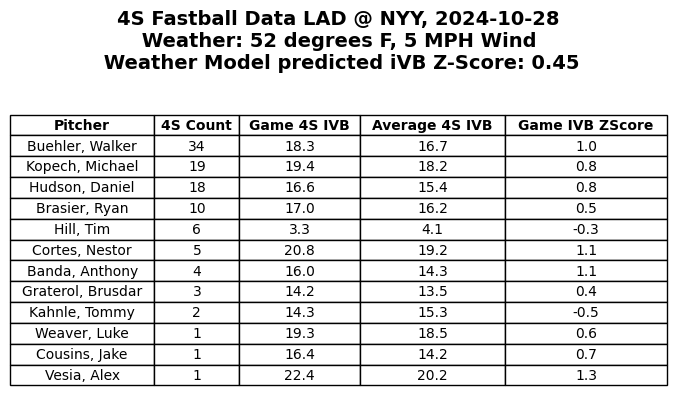

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/4261541208.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


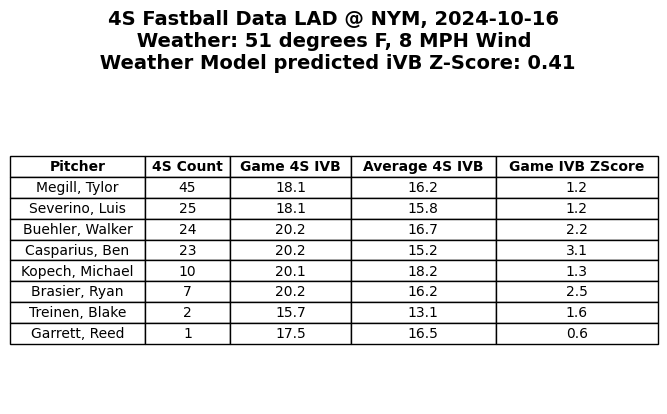

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/4261541208.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


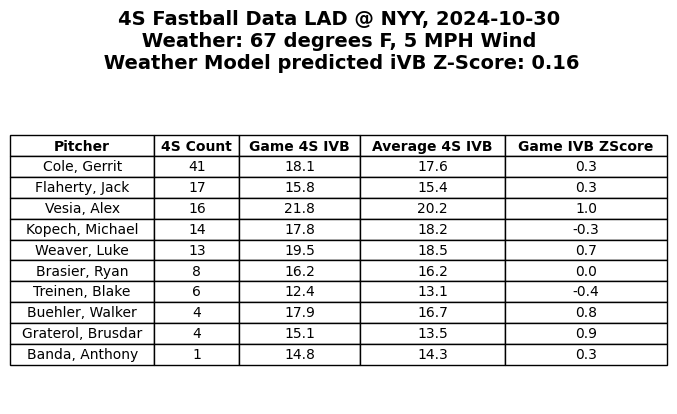

In [425]:
get_game_4s_zscores(775298, is_playoffs=True)
get_game_4s_zscores(775305, is_playoffs=True)
get_game_4s_zscores(775296, is_playoffs=True)


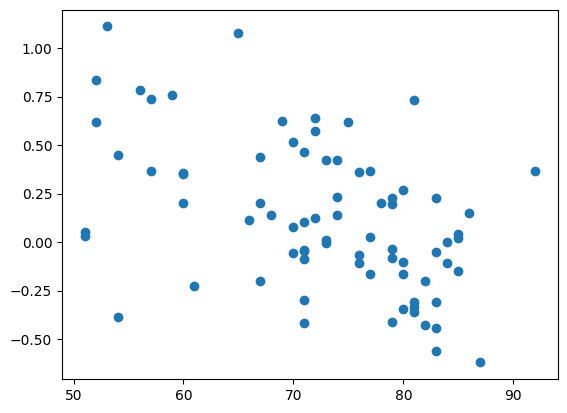

                            OLS Regression Results                            
Dep. Variable:     mean_ff_ivb_zscore   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     12.03
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           3.00e-05
Time:                        20:51:24   Log-Likelihood:                -23.543
No. Observations:                  77   AIC:                             53.09
Df Residuals:                      74   BIC:                             60.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6071      0.309      5.200      0.0

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/305322497.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


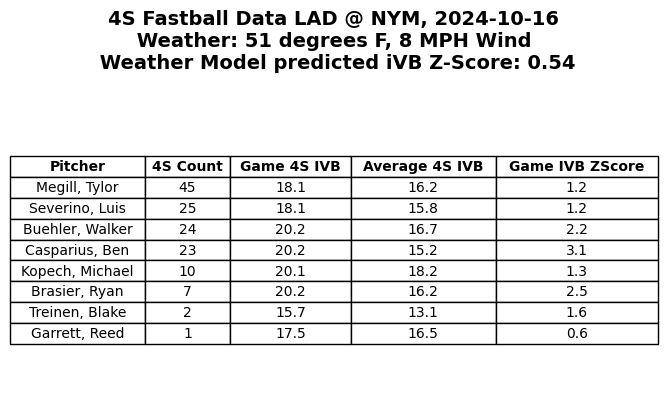

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_90868/305322497.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_round] = df[columns_to_round].round(1)


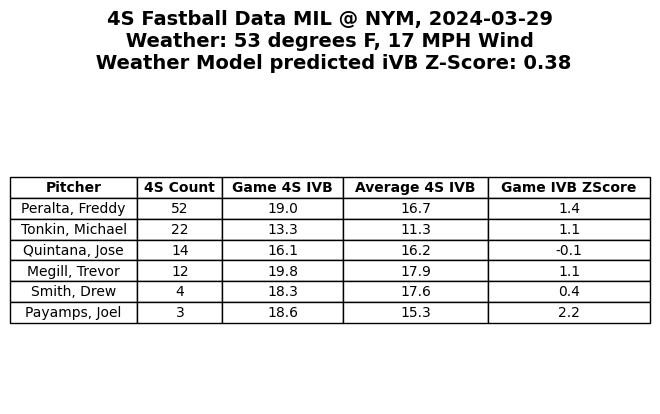

In [453]:
# # TODO: treat windspeed as positive when blowing from home plate, negative when blowing away
# TODO: model citi field ivb zscores only

citi_field_games = all_pitcher_ff_games[(all_pitcher_ff_games['home_team'] == "NYM") & (all_pitcher_ff_games['temp'] != 0)]


plt.scatter(citi_field_games.temp, citi_field_games.mean_ff_ivb_zscore)
plt.show()

citi_field_model = lin_reg(citi_field_games[['temp', 'windspeed']], citi_field_games.mean_ff_ivb_zscore)
citi_field_naive = lin_reg(citi_field_games[['temp']], citi_field_games.mean_ff_ivb_zscore)

get_game_4s_zscores(775305, is_playoffs=True, model=citi_field_model)
get_game_4s_zscores(745848, model=citi_field_model)


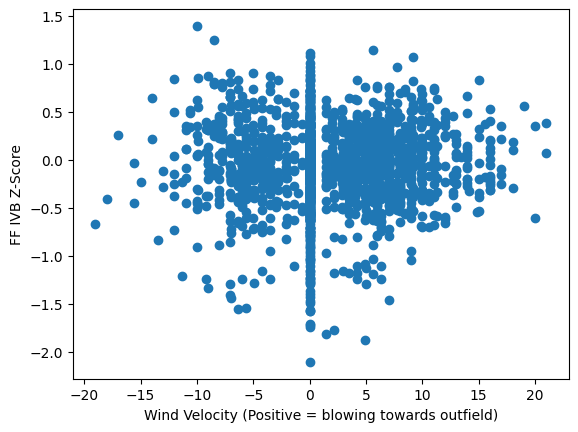

                    windvelocity  mean_ff_ivb_zscore
windvelocity            1.000000            0.017759
mean_ff_ivb_zscore      0.017759            1.000000


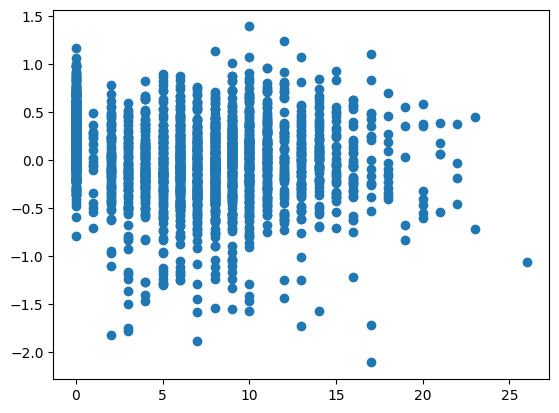

                            OLS Regression Results                            
Dep. Variable:     mean_ff_ivb_zscore   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     210.7
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.10e-82
Time:                        21:41:13   Log-Likelihood:                -824.13
No. Observations:                1748   AIC:                             1654.
Df Residuals:                    1745   BIC:                             1671.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2600      0.065     19.283   

In [473]:
# Model is currently not treating windspeed properly. It says high windspeed means low IVB, which shouldn't be the case.
# High windspeed should be high IVB if it is going to outfield, and low IVB if it is coming from outfield, 0 otherwise.
import math
weather_df_trunc['winddir'].unique()

wind_mapping = {
    'tolf': 1 / math.sqrt(2), 'tocf': 1, 'torf': 1 / math.sqrt(2),  # Assign 1
    'fromlf': -1 / math.sqrt(2), 'fromcf': -1, 'fromrf': -1 / math.sqrt(2),  # Assign -1
}
all_pitcher_ff_games['windvelocity'] =  all_pitcher_ff_games["winddir"].apply(lambda x: wind_mapping.get(x, 0)) * all_pitcher_ff_games['windspeed']

wind_games = all_pitcher_ff_games[all_pitcher_ff_games['winddir'] != "unknown"]

plt.scatter(wind_games.windvelocity, wind_games.mean_ff_ivb_zscore)
plt.xlabel("Wind Velocity (Positive = blowing towards outfield)")
plt.ylabel("FF IVB Z-Score")
plt.show()

print(wind_games[['windvelocity', 'mean_ff_ivb_zscore']].corr())

plt.scatter(all_pitcher_ff_games.windspeed, all_pitcher_ff_games.mean_ff_ivb_zscore)
plt.show()

lin_reg(wind_games[['windvelocity', 'temp']], wind_games['mean_ff_ivb_zscore'])

                                OLS Regression Results                                
Dep. Variable:     mean_ff_ivb_pct_difference   R-squared:                       0.160
Model:                                    OLS   Adj. R-squared:                  0.160
Method:                         Least Squares   F-statistic:                     435.5
Date:                        Fri, 03 Jan 2025   Prob (F-statistic):           1.14e-88
Time:                                11:37:46   Log-Likelihood:                 3724.7
No. Observations:                        2290   AIC:                            -7445.
Df Residuals:                            2288   BIC:                            -7434.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

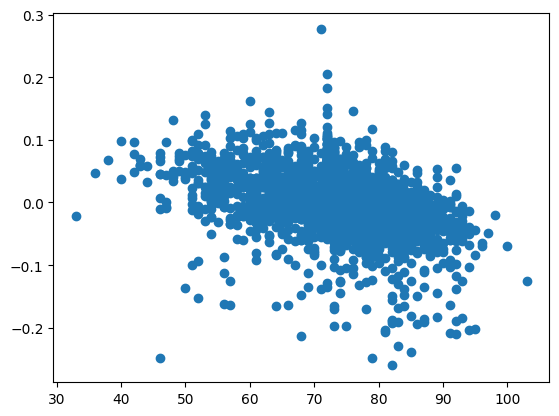

                                temp  mean_ff_ivb_zscore  \
temp                        1.000000           -0.422921   
mean_ff_ivb_zscore         -0.422921            1.000000   
mean_ff_ivb_pct_difference -0.399872            0.974677   

                            mean_ff_ivb_pct_difference  
temp                                         -0.399872  
mean_ff_ivb_zscore                            0.974677  
mean_ff_ivb_pct_difference                    1.000000  


In [487]:
#MODEL PCT DIFFERENCE
lin_reg(all_pitcher_ff_games['temp'], all_pitcher_ff_games['mean_ff_ivb_pct_difference'])

plt.scatter(all_pitcher_ff_games['temp'], all_pitcher_ff_games['mean_ff_ivb_pct_difference'])
plt.show()

print(all_pitcher_ff_games[['temp', 'mean_ff_ivb_zscore', 'mean_ff_ivb_pct_difference']].corr())